In [1]:
import os

import math
import numpy as np
import pandas as pd

import datetime
import time

from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns

import lightgbm as lgb

# https://github.com/reichlab/timeseriesutils
from timeseriesutils import featurize

import datetime


In [2]:
os.chdir('/Users/dk29776/Dropbox/UTAustin/Forecasting/flusion_city')

In [3]:
import sys
sys.path.append('/Users/dk29776/Dropbox/UTAustin/Forecasting/flusion_city/code/data-pipeline/data_pipeline')
import loader 
sys.path.append('/Users/dk29776/Dropbox/UTAustin/Forecasting/flusion_city/code/gbq_city')
import preprocess
import utils2
import run
import gbq

/Users/dk29776/Dropbox/UTAustin/Forecasting/flusion_city/code/gbq_city/run.py:1: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [4]:
os.getcwd()

'/Users/dk29776/Dropbox/UTAustin/Forecasting/flusion_city'

In [5]:
# c("2023-10-01", "2023-11-19", "2024-01-07", "2024-02-18", "2024-03-24")

model_config, run_config = utils2.create_configs(
    ref_date=datetime.date(2024, 3, 23),
    model_name='gbq_qr_nhsn_city_only',
    output_root='output/model_output',
    artifact_store_root='output/model-artifacts',
    save_feat_importance=True,
    short_run=False
)

In [6]:
model_config

namespace(incl_level_feats=True,
          num_bags=100,
          bag_frac_samples=0.7,
          reporting_adj=True,
          sources=['flusurvnet', 'ilinet', 'nhsn_state', 'nhsn_city'],
          fit_locations_separately=False,
          power_transform='4rt',
          model_name='gbq_qr')

In [7]:
target_statecity = ['NY_NEW_YORK', 'CA_LOS_ANGELES', 
                    'IL_CHICAGO', 'TX_HOUSTON', 'AZ_PHOENIX',
                    'PA_PHILADELPHIA', 'NY_ROCHESTER', 'NY_ALBANY',
                    'TX_SAN_ANTONIO', 'TX_DALLAS', 'TX_AUSTIN',
                    'TX_EL_PASO']

run.run_gbq_flu_model(model_config, run_config, target_statecity)

/Users/dk29776/Dropbox/UTAustin/Forecasting/flusion_city/code/data-pipeline/data_pipeline/loader.py:680: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ilinet_state['state_city'] = df_ilinet_state['state']
/Users/dk29776/Dropbox/UTAustin/Forecasting/flusion/src/timeseriesutils/src/timeseriesutils/featurize.py:507: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  .apply(taylor_coefs_one_column_grp,
/Use

In [8]:
ilinet_kwargs = None
flusurvnet_kwargs = None
df = loader.load_data(ilinet_kwargs=ilinet_kwargs,
                       flusurvnet_kwargs=flusurvnet_kwargs,
                       sources=model_config.sources,
                       power_transform=model_config.power_transform)
    

/Users/dk29776/Dropbox/UTAustin/Forecasting/flusion_city/code/data-pipeline/data_pipeline/loader.py:680: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ilinet_state['state_city'] = df_ilinet_state['state']


/var/folders/57/pf1ss2_n1sn5cdzq_nk8v7sm0000gr/T/ipykernel_96934/3825163522.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=nhsn_state_to_plot,
/var/folders/57/pf1ss2_n1sn5cdzq_nk8v7sm0000gr/T/ipykernel_96934/3825163522.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=nhsn_city_to_plot,
/var/folders/57/pf1ss2_n1sn5cdzq_nk8v7sm0000gr/T/ipykernel_96934/3825163522.py:26: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=flusurv_to_plot,
/var/folders/57/pf1ss2_n1sn5cdzq_nk8v7sm0000gr/T/ipykernel_96934/3825163522.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=ilinet_to_plot,


<Axes: xlabel='season_week', ylabel='inc_trans_cs'>

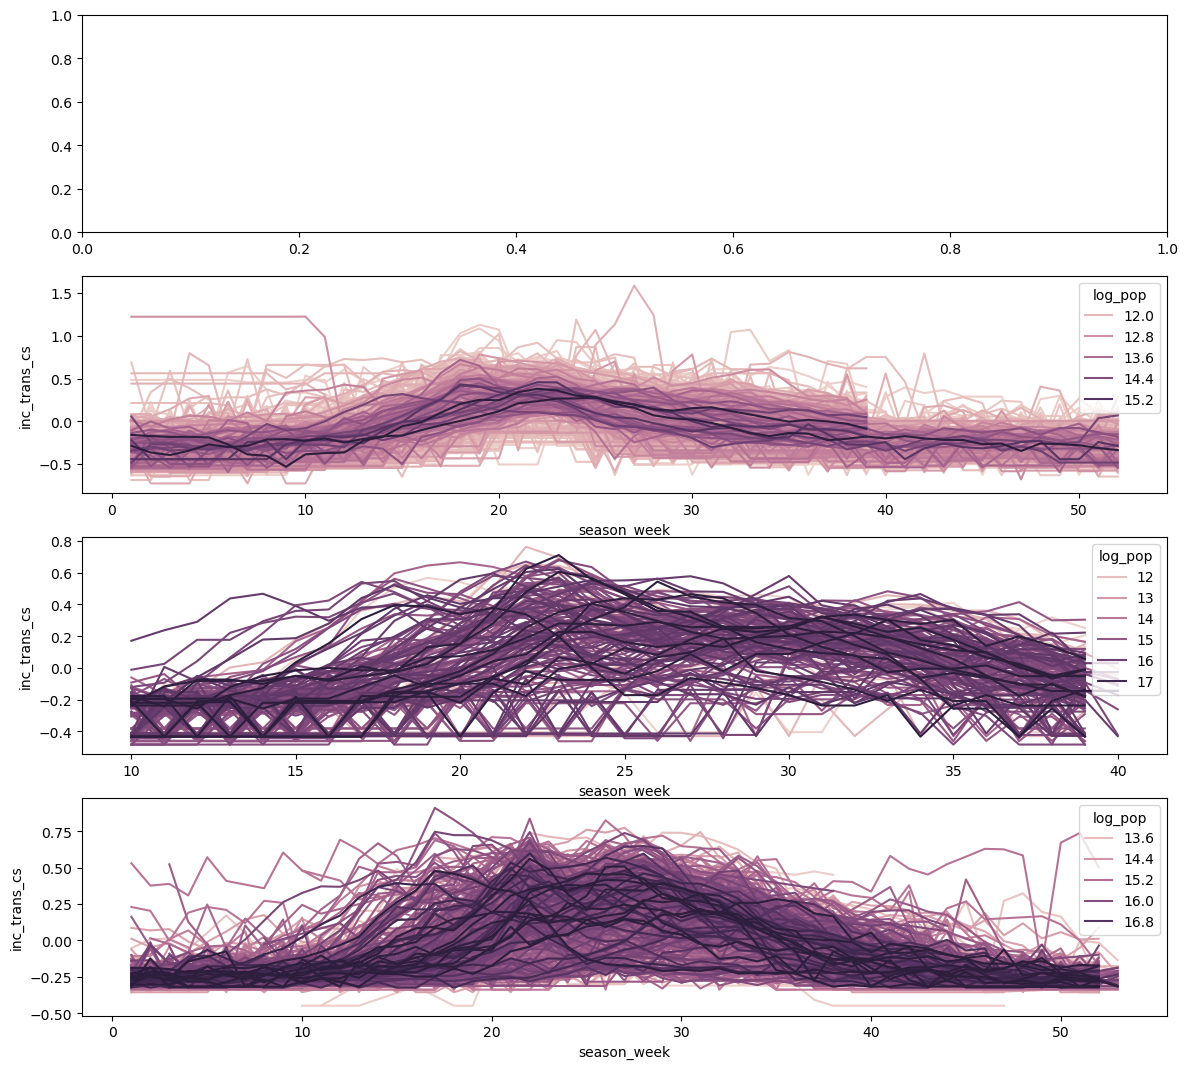

In [9]:
fig, ax = plt.subplots(4, 1)
fig.set_size_inches(14, 13)

nhsn_state_to_plot = df.loc[df['source'] == 'nhsn_state'].assign(season_loc = lambda x: x['season'] + '_' + x['state_city'])
sns.lineplot(data=nhsn_state_to_plot,
             x='season_week',
             y='inc_trans_cs',
             units='season_loc',
             hue='log_pop',
             estimator=None,
             ci=None,
             ax=ax[0])

nhsn_city_to_plot = df.loc[df['source'] == 'nhsn_city'].assign(season_loc = lambda x: x['season'] + '_' + x['state_city'])
sns.lineplot(data=nhsn_city_to_plot,
             x='season_week',
             y='inc_trans_cs',
             units='season_loc',
             hue='log_pop',
             estimator=None,
             ci=None,
             ax=ax[1])


flusurv_to_plot = df.loc[df['source'] == 'flusurvnet'].assign(season_loc = lambda x: x['season'] + '_' + x['state_city'])
sns.lineplot(data=flusurv_to_plot,
             x='season_week',
             y='inc_trans_cs',
             units='season_loc',
             hue='log_pop',
             estimator=None,
             ci=None,
             ax=ax[2])

ilinet_to_plot = df.loc[df['source'] == 'ilinet'].assign(season_loc = lambda x: x['season'] + '_' + x['state_city'])
sns.lineplot(data=ilinet_to_plot,
             x='season_week',
             y='inc_trans_cs',
             units='season_loc',
             hue='log_pop',
             estimator=None,
             ci=None,
             ax=ax[3])

